In [1]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from common import CityResult
from file_name_generator import generate_new_name


Загрузка данных

In [4]:
mypath = '../clusters_results/few_city'

In [5]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

r : dict[str:CityResult]= {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        r[name] = pickle.load(f)
        f.close()

Обработка данных

In [11]:
def func(x,a,b):
    return b*(x**a)

0.45002292810841343
0.467188640388009
0.41119046600949577
0.3951135789127408
0.3422540863537333
0.47979412938133464
0.4390252184273524
0.46197455900627127
0.44759057195885954
0.4485077406861069
0.4292663978345946
0.4249776622127429
0.4033262289114878


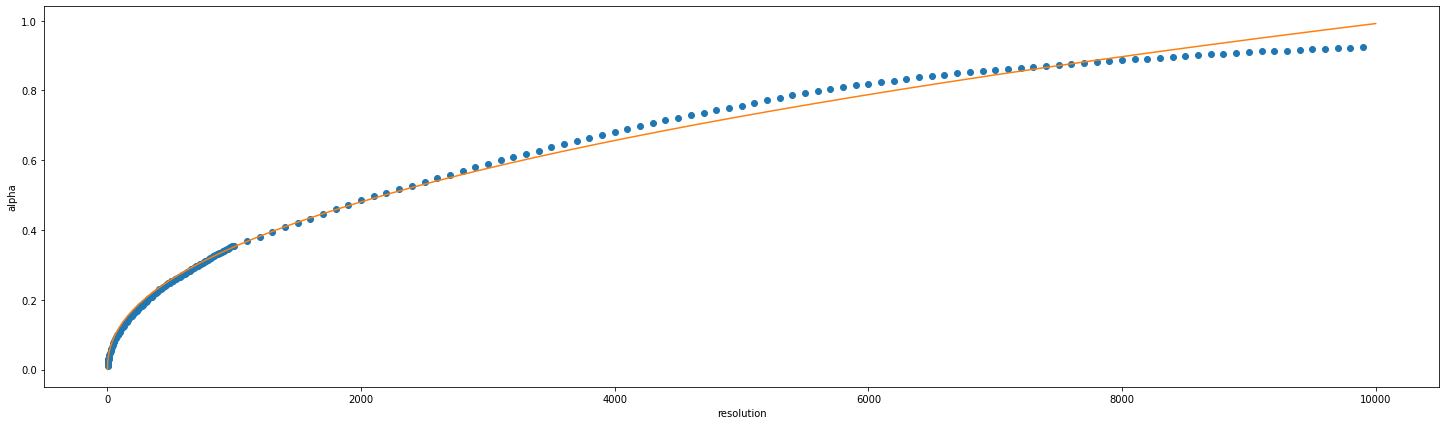

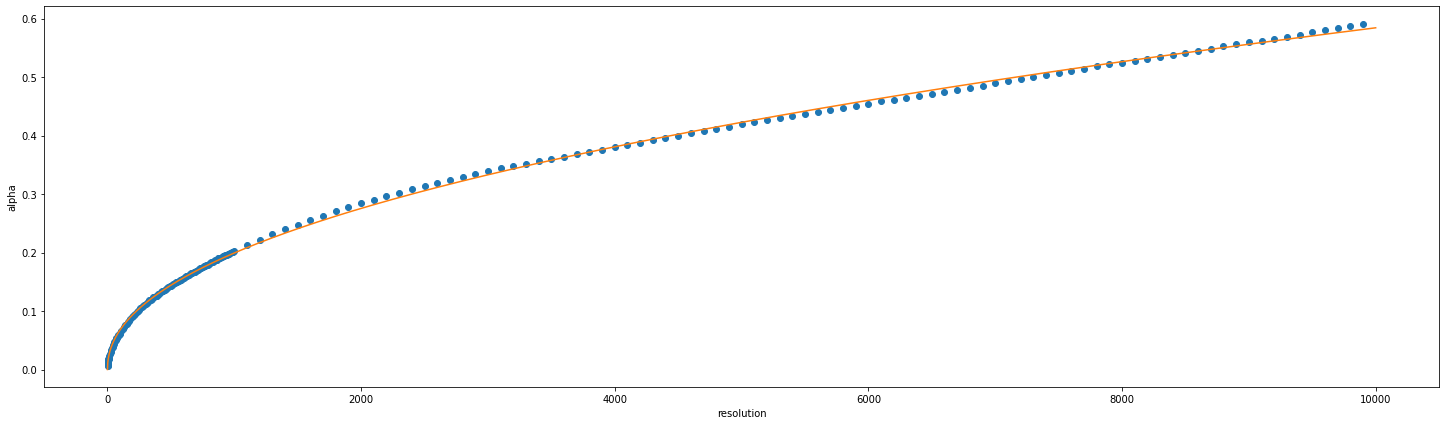

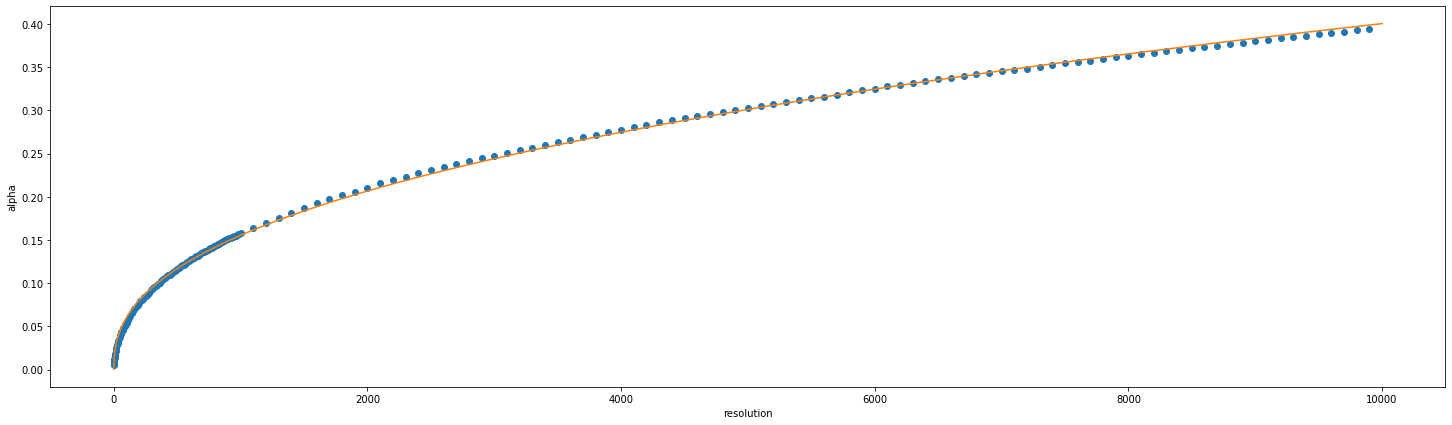

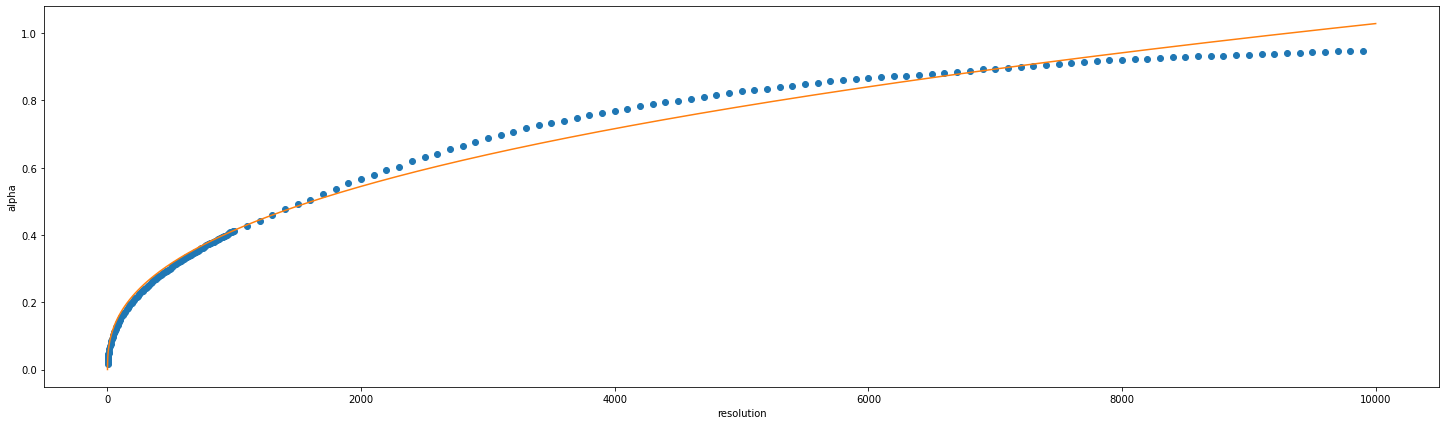

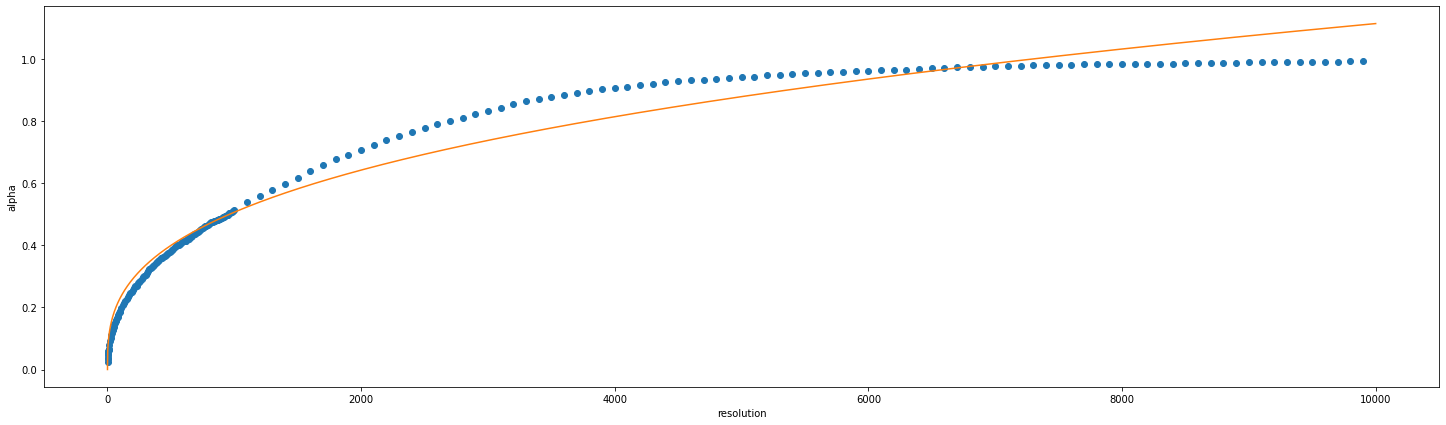

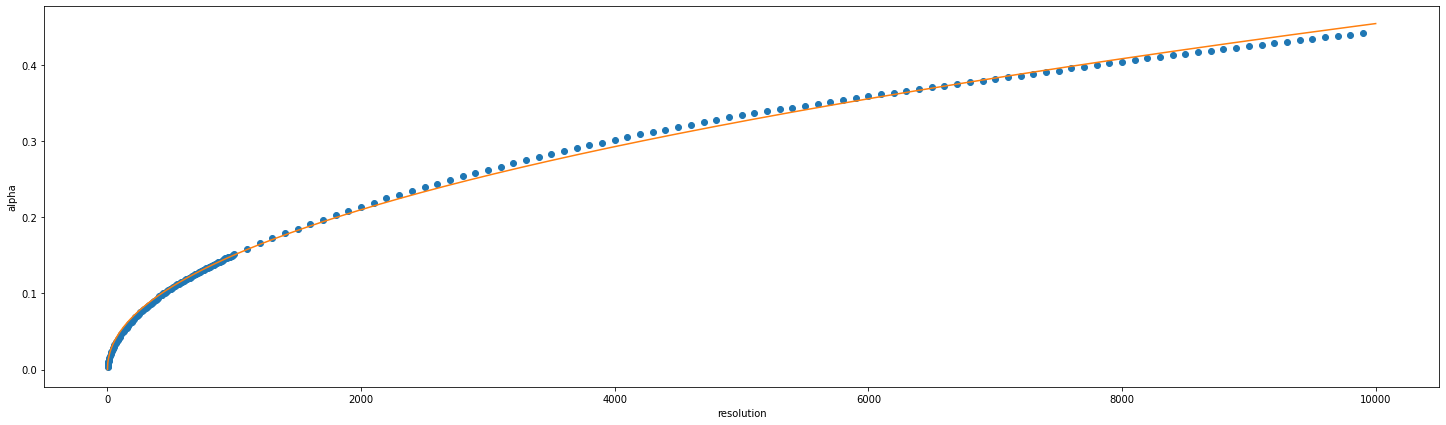

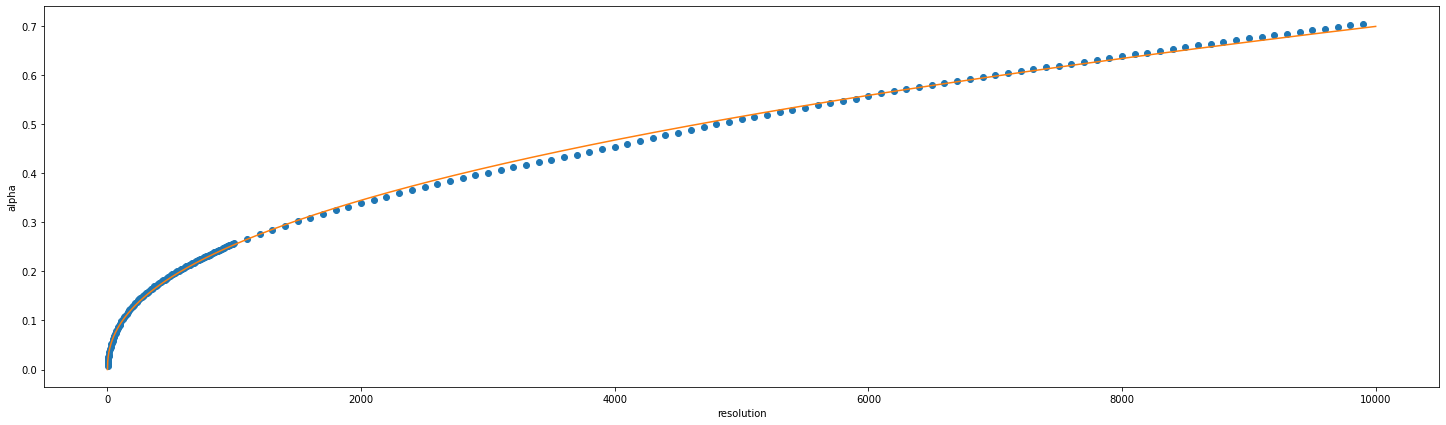

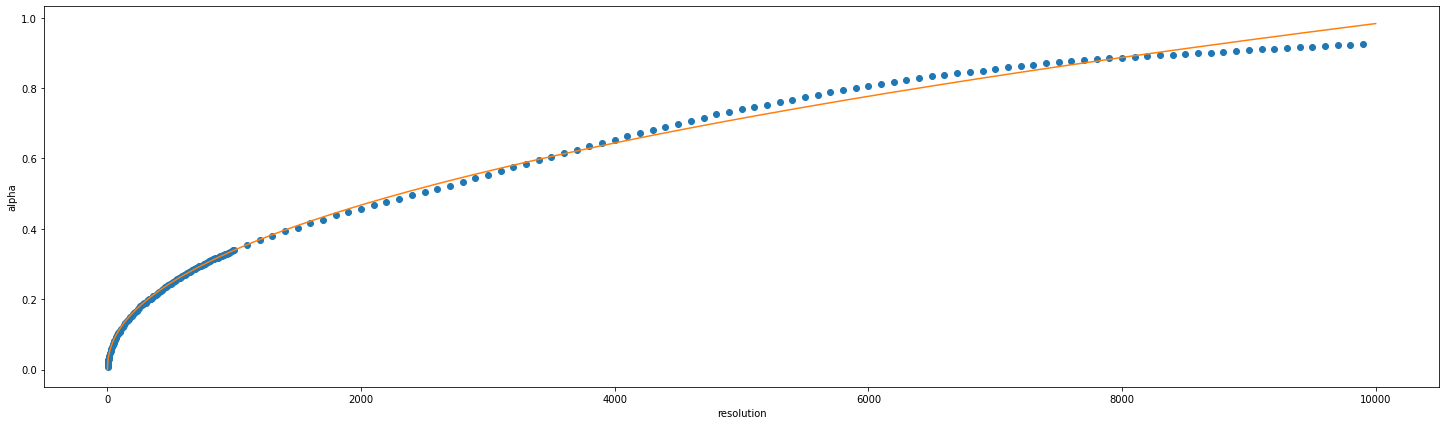

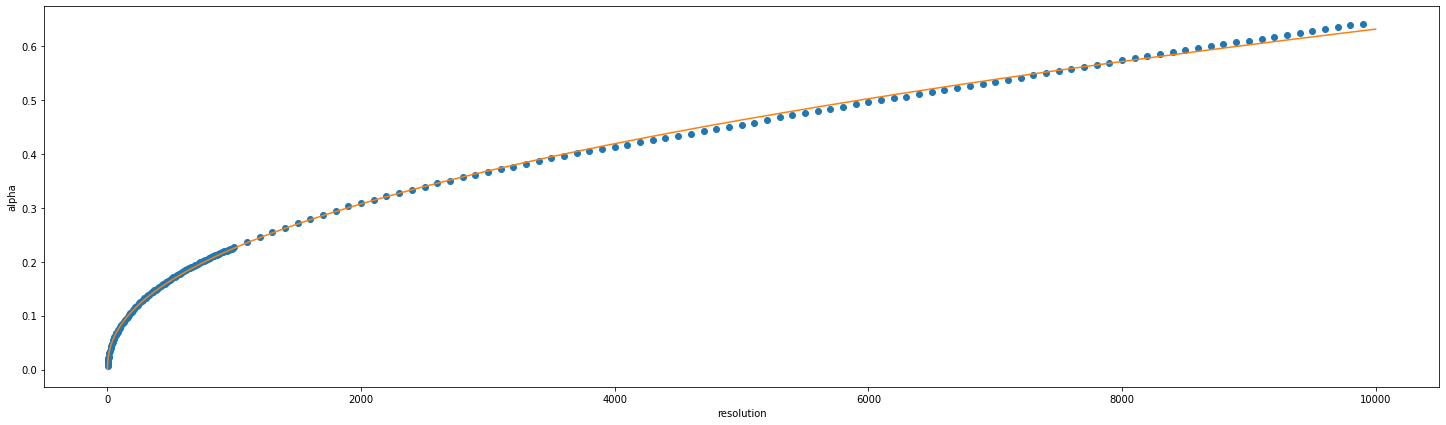

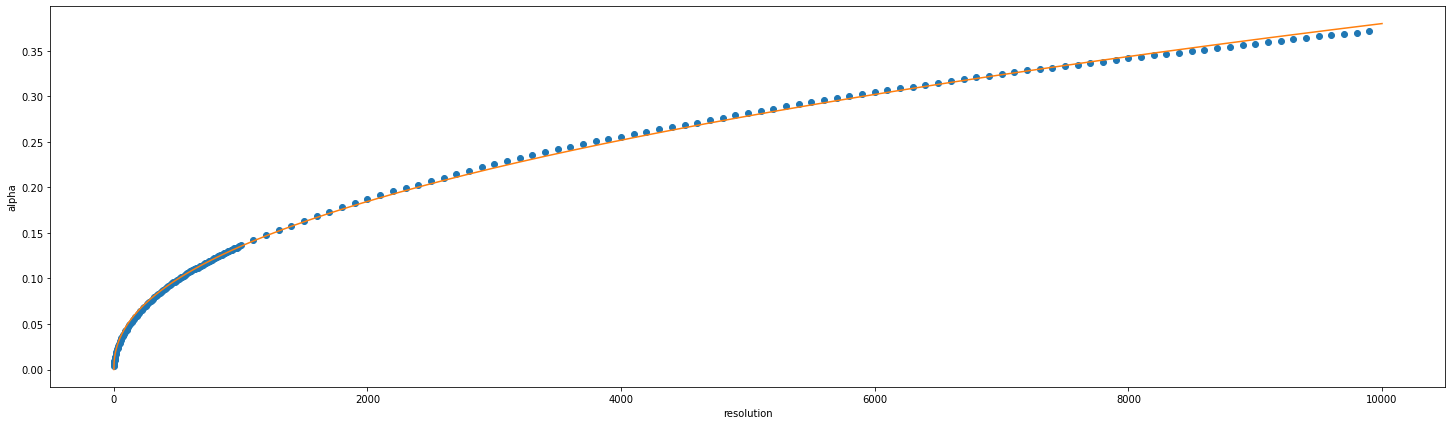

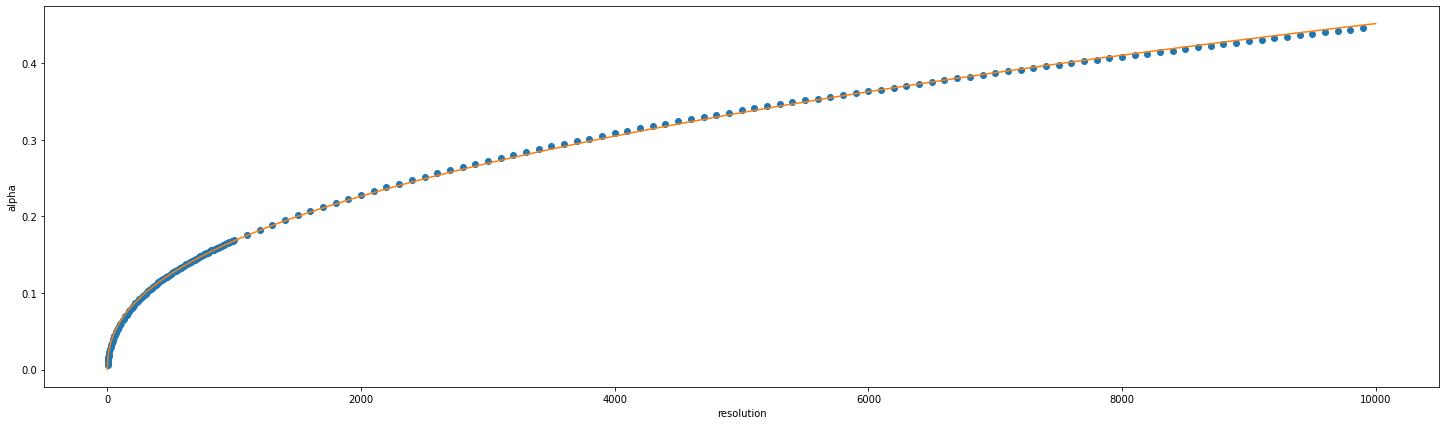

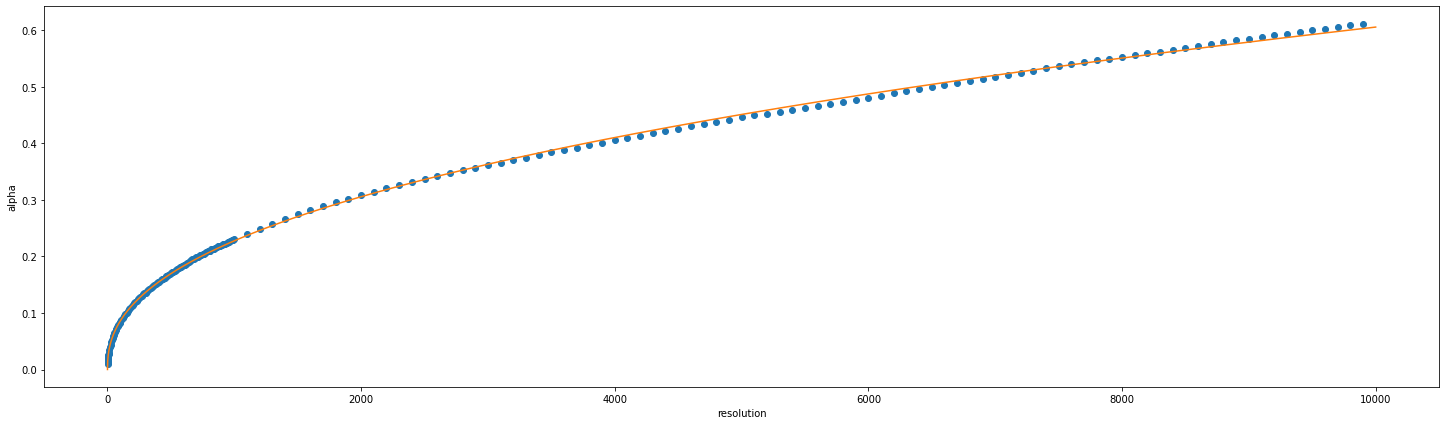

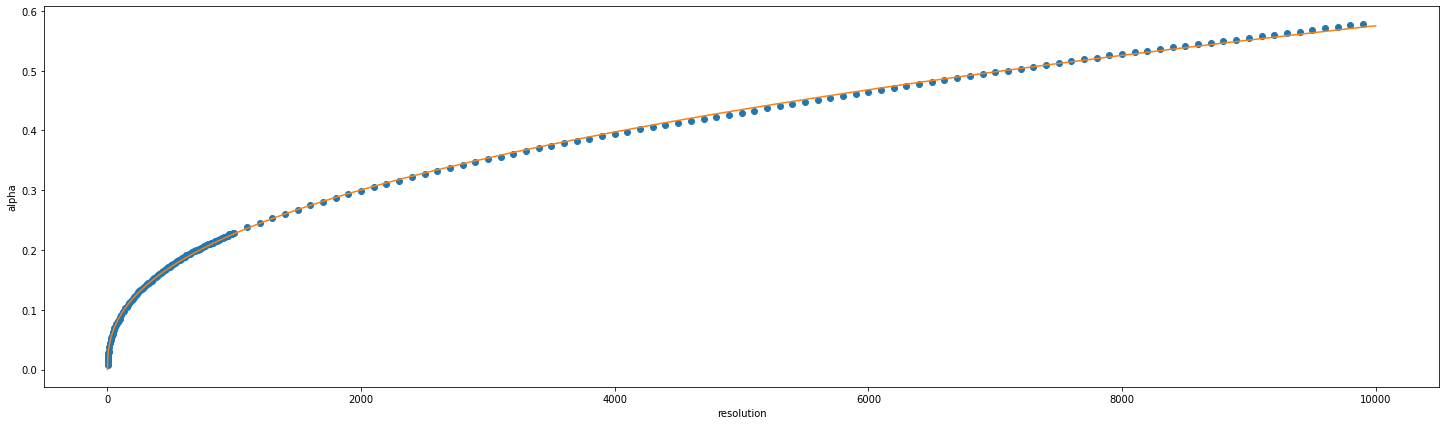

In [50]:
from common import CentroidResult
data = {'a' : [], 'b': [], 'N': [], 'density': []}
for name in r:
    if name == 'ASHA.pkl':
        continue
    res: CityResult = r[name]
    X_r = []
    Y_a = []
    for p_r in res.points_results:
        point_res : CentroidResult = p_r
        X_r.append(point_res.resolution)
        Y_a.append(point_res.alpha)

    fig, axs = plt.subplots(1, 1)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs.errorbar(X_r, Y_a, fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs.set(xlabel='resolution', ylabel='alpha')

    popt = curve_fit(func, X_r, Y_a)
    XX = np.linspace(0,10000,10000)
    YY = func(XX, popt[0][0], popt[0][1])
    axs.errorbar(XX, YY)
    print(popt[0][0])
    data['a'].append(popt[0][0])
    data['b'].append(popt[0][1])
    data['N'].append(res.nodes)
    data['density'].append(res.density)

In [18]:
data

{'a': [0.45002292810841343,
  0.467188640388009,
  0.41119046600949577,
  0.3951135789127408,
  0.3422540863537333,
  0.47979412938133464,
  0.4390252184273524,
  0.46197455900627127,
  0.44759057195885954,
  0.4485077406861069,
  0.4292663978345946,
  0.4249776622127429,
  0.4033262289114878],
 'b': [0.45002292810841343,
  0.467188640388009,
  0.41119046600949577,
  0.3951135789127408,
  0.3422540863537333,
  0.47979412938133464,
  0.4390252184273524,
  0.46197455900627127,
  0.44759057195885954,
  0.4485077406861069,
  0.4292663978345946,
  0.4249776622127429,
  0.4033262289114878],
 'N': [8924,
  28063,
  58334,
  5467,
  3347,
  49487,
  17742,
  9574,
  21637,
  70887,
  43508,
  22336,
  23860],
 'density': [0.00035027504854647407,
  0.00010683121614891393,
  4.9646802021516405e-05,
  0.0005099954080334718,
  0.0008066747018634239,
  5.8893051666163217e-05,
  0.00017014188633679447,
  0.00032590703900503885,
  0.0001284535394352366,
  3.8846974063531454e-05,
  6.397371043541451e-

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_22232\953130745.py:2: RuntimeWarning: overflow encountered in power
  return b*(x**a)


(array([-0.73957909, 37.37247586]), array([[ 3.59211429e-03, -1.30749341e+00],
       [-1.30749341e+00,  4.78890561e+02]]))


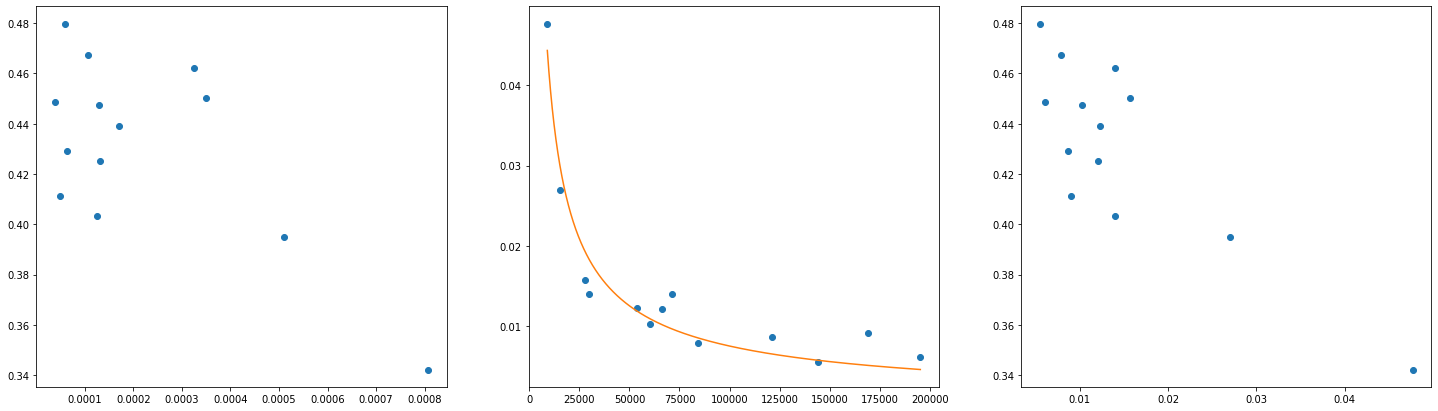

In [49]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(25)
fig.set_figheight(7)

axs[0].errorbar( np.array(data['density']), data['a'], fmt='o')
axs[1].errorbar(np.array(data['density']) * np.array(data['N']) *(np.array(data['N'])-1), data['b'], fmt='o')

axs[2].errorbar(data['b'], data['a'], fmt='o')

x= np.array(data['density']) * np.array(data['N']) *(np.array(data['N'])-1)
popt = curve_fit(func, np.array(data['density']) * np.array(data['N']) *(np.array(data['N'])-1), data['b'],p0=[-2, 0.01])
XX = np.linspace(min(x),max(x),10000)
YY = func(XX, popt[0][0], popt[0][1])
axs[1].errorbar(XX, YY)

print(popt)

# axs.set(xlabel='resolution', ylabel='alpha')


In [ ]:
def theory_func(x,c, g, N = 9574, b0 = 1):
    x = x * c
    q = np.log(x) / np.log(N)
    return g / (x / b0 * (1 + q) + c / (np.sqrt(x * N)) * (1 - q))

In [ ]:
X_a = {}
Y_err = {}
Y_err_std = {}

Y_speedup = {}

for name in r:
    result: CityResult = r[name]
    X_a[name] = [a.alpha for a in result.points_results]
    Y_err[name] = [np.mean(a.errors) for a in result.points_results]
    Y_err_std[name] = [np.std(a.errors) for a in result.points_results]
    Y_speedup[name] = [np.mean(a.speed_up) for a in result.points_results]

Графики:

In [ ]:
city_to_n = {}
X_max = {}
Y_speedup_max = {}
Y_err_speedup = {}

c = {}
b = {}
for name in r:
    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs[0].errorbar(X_a[name], Y_speedup[name], fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs[0].set(xlabel='alpha'+ str(r[name].density), ylabel='ускорение')

    func_r = partial(theory_func, N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    print(str(r[name].nodes) + ' ' + str(r[name].edges/r[name].nodes))
    print(str(r[name].nodes) + ' ' + str(2*r[name].edges/(r[name].nodes * (r[name].nodes-1))))

    _x = np.array(X_a[name])
    _x = _x[_x < 0.6]
    _xx = np.linspace(min(_x), max(_x), 100)


    _y = np.array(Y_speedup[name])[0:len(_x)]
    popt = curve_fit(func_r, _x, _y, p0=[0.0003, 4],bounds=(0,[10,1000]))
    # if 'ASHA' in name:
    #     func_target = partial(theory_func, c=0.00005, g=25,N=r[name].nodes, b0=r[name].density)
    # else:
    func_target = partial(theory_func, c=popt[0][0], g=popt[0][1],N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    a = scipy.optimize.fminbound(lambda x: -func_target(x), 0, 0.5)
    city_to_n[name] = r[name].nodes
    X_max[name] = a
    Y_speedup_max[name] = func_target(a)

    c[name] = popt[0][0]
    b[name] = popt[0][1]

    _y = func_target(np.array(_xx))
    axs[0].errorbar(_xx, _y, linewidth=3, label = "c:{}\n g:{}".format(popt[0][0],popt[0][1]))
    axs[0].legend()
    axs[1].errorbar(X_a[name], Y_err[name], fmt='o')
    axs[1].set(xlabel='alpha' + str(r[name].density), ylabel='средняя относительная ошибка')
    z = np.polyfit(X_a[name], Y_err[name], 6)
    p = np.poly1d(z)
    axs[1].errorbar(_xx, p(_xx), fmt='o')
    Y_err_speedup[name] = p(a)



    axs[2].errorbar(X_a[name], Y_err_std[name], fmt='o')
    axs[2].set(xlabel='alpha'+ str(r[name].density), ylabel='погрешность ошибки')

    # file_name = generate_new_name(name + '.png', 'plots')

    # plt.savefig(file_name)

Построим график ускорения от плотности

In [ ]:
# X_max = {}
# Y_speedup_max = {}
# Y_err_speedup = {}

def t_f(x, N, b):
    return

fig, axs = plt.subplots(1, 5)
fig.set_figwidth(30)
fig.set_figheight(7)


X_betta = [city_to_n[name] for name in city_to_n]
Y_betta_speedup =[Y_speedup_max[n] for n in Y_speedup_max]
Y_betta_err =[Y_err_speedup[n] for n in Y_err_speedup]

Y_c = [c[name] for name in c]
Y_b = [b[name] for name in b]

axs[0].errorbar(X_betta, Y_betta_speedup, fmt='o')
axs[0].set(xlabel='плотность', ylabel='максимальное ускорение')


axs[1].errorbar(X_betta, Y_betta_err, fmt='o')
axs[1].set(xlabel='плотность', ylabel='относительная ошибка при максимаольном кскорении')



axs[2].errorbar(X_betta, Y_c, fmt='o')
axs[2].set(xlabel='плотность', ylabel='c')
X_betta = [r[n].density for n in r]

axs[3].errorbar(X_betta, Y_b, fmt='o')
axs[3].set(xlabel='плотность', ylabel='b')


axs[4].errorbar(X_betta, [X_max[name] for name in X_max], fmt='o')
axs[4].set(xlabel='плотность', ylabel='alpha')

plt.show()

In [ ]:
def line(x, a,b):
    return a*x + b

def line_predict(x, a,b,alpha, N):
    # print("a:{:.2f} n:{:.2f}".format(alpha, N))
    return a*x/(alpha * (1 + np.log(alpha)/np.log(N))) + b

def inverse(x,a,b,c):
    return a*(x**c) + b

Уберем последние 4 точки

In [ ]:
# X_max = {}
# Y_speedup_max = {}
# Y_err_speedup = {}

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(25)
fig.set_figheight(7)

X_max_1 = dict(list(X_max.items())[0:-5])
X_betta = [r[n].density for n in r][0:-5]
Y_betta_speedup =[Y_speedup_max[n] for n in Y_speedup_max][0:-5]
Y_betta_err =[Y_err_speedup[n] for n in Y_err_speedup][0:-5]

axs[0].errorbar(X_betta, Y_betta_speedup, fmt='o')
axs[0].set(xlabel='плотность', ylabel='максимальное ускорение')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X_betta,Y_betta_speedup)

_x = np.linspace(min(X_betta), max(X_betta))
_y = slope * _x + intercept
axs[0].errorbar(_x, _y,label = '{:.2f}x + {:.2f}. R2:{:.4f}'.format(slope,intercept, r_value**2))
axs[0].legend()


# _x = X_betta
# f = partial(line_predict, N = [r[name].nodes for name in r][0])
# _y = []
# for i,a in enumerate(X_max_1):
#     _y.append(f(_x[i], slope/15, intercept, X_max_1[a]))
#
# axs[0].errorbar(_x, _y, fmt = 'o')
# axs[0].legend()



axs[1].errorbar(X_betta, Y_betta_err, fmt='o')
axs[1].set(xlabel='плотность', ylabel='относительная ошибка при максимаольном кскорении')

popt = curve_fit(inverse, X_betta, Y_betta_err, p0=[0.000000015, -1.5,0.06])
_xx = np.linspace(min(X_betta), max(X_betta), 300)
_yy = inverse(_xx, *popt[0])
axs[1].errorbar(_xx, _yy,label = '{:.10f}x^(-2) + {:.4f}'.format(popt[0][0],popt[0][1]))
axs[1].legend()
plt.show()

In [ ]:
from graph_generator import get_graph

H = get_graph('R2555133')


In [ ]:
def _f(x, N):
    q = np.log(x) / np.log(N)
    return 1 / (x * (1 + q) + 1 / (np.sqrt(x * N)) * (1 - q))

for name in r:
    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs[0].errorbar(X_a[name], Y_speedup[name], fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs[0].set(xlabel='alpha'+ str(r[name].density), ylabel='ускорение')

    # func_r = partial(theory_func, N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    # print(str(r[name].nodes) + ' ' + str(r[name].edges/r[name].nodes))
    # print(str(r[name].nodes) + ' ' + str(2*r[name].edges/(r[name].nodes * (r[name].nodes-1))))

    _x = np.array(X_a[name])
    _x = _x[_x < 0.6]
    _xx = np.linspace(min(_x), max(_x), 100)

    func_target = partial(_f, N=r[name].nodes)
    _y = func_target(np.array(_xx))
    axs[0].errorbar(_xx, _y, linewidth=3)
    axs[0].legend()
    # axs[1].errorbar(X_a[name], Y_err[name], fmt='o')
    # axs[1].set(xlabel='alpha' + str(r[name].density), ylabel='средняя относительная ошибка')
    # z = np.polyfit(X_a[name], Y_err[name], 6)
    # p = np.poly1d(z)
    # axs[1].errorbar(_xx, p(_xx), fmt='o')
    # Y_err_speedup[name] = p(a)
    #
    #
    #
    # axs[2].errorbar(X_a[name], Y_err_std[name], fmt='o')
    # axs[2].set(xlabel='alpha'+ str(r[name].density), ylabel='погрешность ошибки')

    # file_name = generate_new_name(name + '.png', 'plots')

    # plt.savefig(file_name)

In [ ]:
def _f(x, N):
    q = np.log(x) / np.log(N)
    return 1 / (x * (1 + q) + 1 / (2*np.sqrt(x * N)) * (1 - q))

arr_N = [i for i in range(10000, 100000,100)]
y = []
for i in arr_N:
    func_target = partial(_f, N=i)
    a = scipy.optimize.fminbound(lambda x: -func_target(x), 0, 1)
    y.append(func_target(a))

fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)

axs.errorbar(arr_N, y, linewidth=3,label='a')
axs.errorbar(arr_N, (np.array(arr_N)) ** 0.317 -1.5, linewidth=3, label = 'b')
axs.legend()
